In [133]:
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [11]:
df = pd.read_excel('CIMCO Log_M1_1.xlsx', parse_dates=['date'])
print(df.shape)

df.head()

(61842, 27)


,monitorid,date,monitortype,monitorport,monitortag,monitortext,monitorfile,monitorprogram,monitorjob,monitoroperator,...,monitorvar7,monitorvar8,monitorvar9,monitorvar10,monitorvar11,monitorvar12,monitorvar13,monitorvar14,monitorvar15,monitorvar16
0,8076509,2019-12-05 01:00:00,4096,271,YLOAD,Percentage of Max Y-load: 48,NaN,2940.0,2940.0,Kim,...,NaN,NaN,0,0,0,0,0,0,0,0
1,8076511,2019-12-05 01:00:00,4096,271,XPOS,Absolute X-position,NaN,2940.0,2940.0,Kim,...,NaN,NaN,0,0,0,0,0,0,0,0
2,8076512,2019-12-05 01:00:00,4096,271,YPOS,Absolute Y-position,NaN,2940.0,2940.0,Kim,...,NaN,NaN,0,0,0,0,0,0,0,0
3,8076513,2019-12-05 01:00:00,4096,271,ZPOS,Absolute Y-position,NaN,2940.0,2940.0,Kim,...,NaN,NaN,0,0,0,0,0,0,0,0
4,8076516,2019-12-05 01:00:01,4096,271,XPOS,Absolute X-position,NaN,2940.0,2940.0,Kim,...,NaN,NaN,0,0,0,0,0,0,0,0


In [12]:
cols_to_drop = ['monitorid', 'monitortype', 'monitorport', 'monitorfile', 'monitorjob', 'monitoroperator', 'monitorerrinfo']
cols_to_drop += [f'monitorvar{i}' for i in range(3,17)]

df.drop(cols_to_drop, axis=1, inplace=True)
df.head()

,date,monitortag,monitortext,monitorprogram,monitorvar1,monitorvar2
0,2019-12-05 01:00:00,YLOAD,Percentage of Max Y-load: 48,2940.0,48,NaN
1,2019-12-05 01:00:00,XPOS,Absolute X-position,2940.0,35.423,NaN
2,2019-12-05 01:00:00,YPOS,Absolute Y-position,2940.0,9.29,NaN
3,2019-12-05 01:00:00,ZPOS,Absolute Y-position,2940.0,2.32915,NaN
4,2019-12-05 01:00:01,XPOS,Absolute X-position,2940.0,35.3674,NaN


In [80]:
%%time
tags = {'ALARMON': 'alarm', 'ESTOPON': 'estop', 'FEEDRATE1': 'frate1', 'FEEDRATE2': 'frate2', 
       'FEEDRATE4': 'frate3', 'RAPIDRATE1': 'rapid1', 'RAPIDRATE2': 'rapid2', 'RAPIDRATE4': 'rapid3',
       'ROTVEL': 'rotvel', 'TOOL': 'tool', 'TEMP': 'temp', 'XPOS': 'xpos', 'YPOS': 'ypos',
       'ZPOS': 'zpos', 'XLOAD': 'xload', 'YLOAD': 'yload', 'ZLOAD': 'zload'}
absent_tags = defaultdict(list)
new_df = []

for i,row in df.iterrows():
    tag = None
    record = dict()
    record['date'] = row['date']
    record['program'] = row['monitorprogram']
    try:
        tag = tags[row['monitortag']]
        record[tag] = row['monitorvar1']
    except KeyError as err:
        absent_tags[row['monitortag']].append(i)
    record['var2'] = row['monitorvar2']
    
    if i == 0:
        new_df.append(record)
    elif new_df[-1]['date'] == record['date']:
        if not tag or tag in new_df[-1]:
            new_df.append(record)
        else:
            new_df[-1][tag] = record[tag]
    else:
        new_df.append(record)
    
new_df = pd.DataFrame(new_df, columns='''date program alarm estop frate1 frate2 frate3 
rapid1 rapid2 rapid3 var2 rotvel tool temp xpos ypos zpos xload yload zload'''.split())

print(new_df.shape)

(21157, 20)


In [81]:
new_df.head(10)

,date,program,alarm,estop,frate1,frate2,frate3,rapid1,rapid2,rapid3,var2,rotvel,tool,temp,xpos,ypos,zpos,xload,yload,zload
0,2019-12-05 01:00:00,2940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.423,9.29,2.32915,NaN,48,NaN
1,2019-12-05 01:00:01,2940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.3674,9.77955,0.15,NaN,NaN,NaN
2,2019-12-05 01:00:02,2940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.5169,19.122,NaN,NaN,NaN,NaN
3,2019-12-05 01:00:03,2940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.03275,31.57095,NaN,NaN,NaN,NaN
4,2019-12-05 01:00:05,2940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.4523,20.5844,NaN,NaN,NaN,NaN
5,2019-12-05 01:00:06,2940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.56255,5.144,NaN,NaN,43,NaN
6,2019-12-05 01:00:08,2940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.39325,-13.2683,NaN,NaN,NaN,NaN
7,2019-12-05 01:00:08,2940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.6454,-27.89875,NaN,NaN,NaN,NaN
8,2019-12-05 01:00:10,2940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.733,-25.3833,NaN,NaN,51,NaN
9,2019-12-05 01:00:11,2940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.4688,-10.0463,NaN,NaN,NaN,NaN


In [57]:
print(f"MonitorTags not considered :\n{absent_tags.keys()}")

MonitorTags not considered :
dict_keys(['SETPROGRAM', 'CYCLESTOP', 'CYCLESTART', 'PALLETN', 'FEEDHOLDON', 'MANUALMODE', 'MANUALDATAINPUTMODE', 'RAPIDRATE3', 'AUTOMATICMODE', 'JOBSTART', 'PARTCOMPLETE', 'FEEDHOLDOFF'])


In [82]:
for col in ['xpos', 'ypos', 'zpos']:
    print(f"Null value count in '{col}' --> {new_df[col].isnull().sum()}")

for col in ['xpos', 'ypos', 'zpos']:
    new_df[col].fillna(method='ffill', inplace=True)
    
for col in ['xpos', 'ypos', 'zpos']:
    print(f"Null value count in '{col}' --> {new_df[col].isnull().sum()}")

Null value count in 'xpos' --> 9494
Null value count in 'ypos' --> 9284
Null value count in 'zpos' --> 7595
Null value count in 'xpos' --> 0
Null value count in 'ypos' --> 0
Null value count in 'zpos' --> 0


In [71]:
new_df.head()

,date,program,alarm,estop,frate1,frate2,frate3,rapid1,rapid2,rapid3,var2,rotvel,tool,temp,xpos,ypos,zpos,xload,yload,zload
0,2019-12-05 01:00:00,2940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.423,9.29,2.32915,NaN,48,NaN
1,2019-12-05 01:00:01,2940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.3674,9.77955,0.15,NaN,NaN,NaN
2,2019-12-05 01:00:02,2940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.5169,19.122,0.15,NaN,NaN,NaN
3,2019-12-05 01:00:03,2940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.03275,31.57095,0.15,NaN,NaN,NaN
4,2019-12-05 01:00:05,2940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.4523,20.5844,0.15,NaN,NaN,NaN


In [87]:
new_df['program'].unique().shape

(22,)

In [88]:
df['monitorprogram'].unique().shape

(22,)

In [96]:
for col in ['xpos', 'ypos', 'zpos', 'xload', 'yload', 'zload']:
    new_df[col] = new_df[col].astype('float64')
new_df.dtypes

date       datetime64[ns]
program           float64
alarm              object
estop              object
frate1             object
frate2             object
frate3             object
rapid1             object
rapid2            float64
rapid3             object
var2               object
rotvel             object
tool               object
temp               object
xpos              float64
ypos              float64
zpos              float64
xload             float64
yload             float64
zload             float64
dtype: object

In [108]:
for col in ['xload', 'yload', 'zload']:
    print(f"Null value count in '{col}' --> {new_df[col].isnull().sum()}")

Null value count in 'xload' --> 18120
Null value count in 'yload' --> 15581
Null value count in 'zload' --> 15447


In [144]:
def plot_graph(prog):
    data = new_df[new_df['program'] == prog]
    
    # This dictionary defines the colormap
    cdict = {'red':  ((0.0, 0.0, 0.0),   # no red at 0
                      (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                      (1.0, 0.8, 0.8)),  # set to 0.8 so its not too bright at 1

            'green': ((0.0, 0.8, 0.8),   # set to 0.8 so its not too bright at 0
                      (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                      (1.0, 0.0, 0.0)),  # no green at 1

            'blue':  ((0.0, 0.0, 0.0),   # no blue at 0
                      (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                      (1.0, 0.0, 0.0))   # no blue at 1
           }

    # Create the colormap using the dictionary
    GnRd = colors.LinearSegmentedColormap('GnRd', cdict, N=256)

    data.plot.scatter('xpos', 'ypos', c='xload', cmap=GnRd, 
                                               figsize=(10,8), title=f'xpos vs ypos (Program: {prog})');
    data.plot.scatter('xpos', 'ypos', c='yload', cmap=GnRd, 
                                               figsize=(10,8), title=f'xpos vs ypos (Program: {prog})');
    data.plot.scatter('xpos', 'ypos', c='zload', cmap=GnRd, 
                                               figsize=(10,8), title=f'xpos vs ypos (Program: {prog})');
    
    data.plot.scatter('xpos', 'zpos', c='xload', cmap=GnRd, 
                                               figsize=(10,8), title=f'xpos vs zpos (Program: {prog})');
    data.plot.scatter('xpos', 'zpos', c='yload', cmap=GnRd, 
                                               figsize=(10,8), title=f'xpos vs zpos (Program: {prog})');
    data.plot.scatter('xpos', 'zpos', c='zload', cmap=GnRd, 
                                               figsize=(10,8), title=f'xpos vs zpos (Program: {prog})');
    
    data.plot.scatter('ypos', 'zpos', c='xload', cmap=GnRd, 
                                               figsize=(10,8), title=f'ypos vs zpos (Program: {prog})');
    data.plot.scatter('ypos', 'zpos', c='yload', cmap=GnRd, 
                                               figsize=(10,8), title=f'ypos vs zpos (Program: {prog})');
    data.plot.scatter('ypos', 'zpos', c='zload', cmap=GnRd, 
                                               figsize=(10,8), title=f'ypos vs zpos (Program: {prog})');

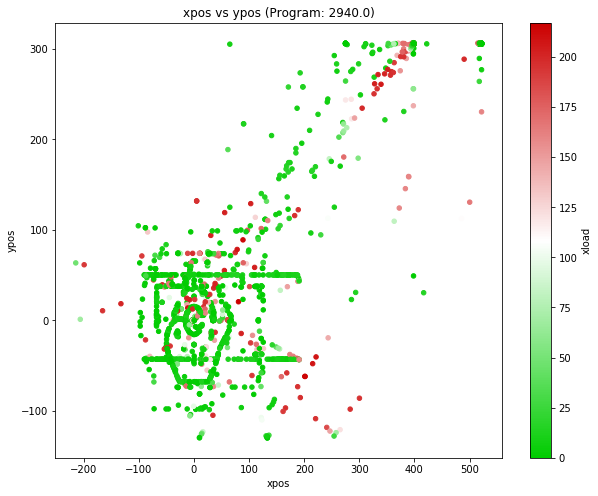

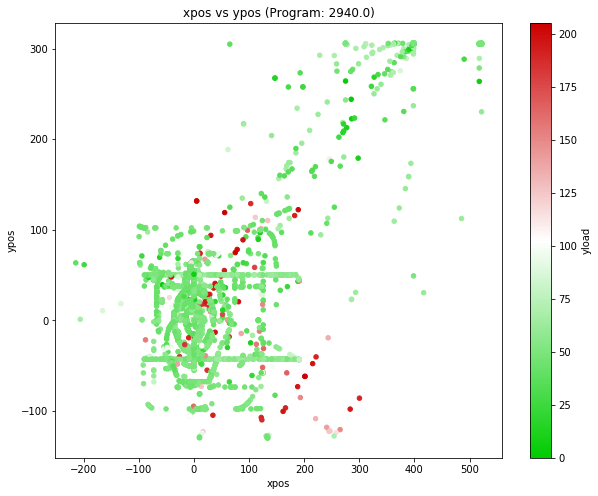

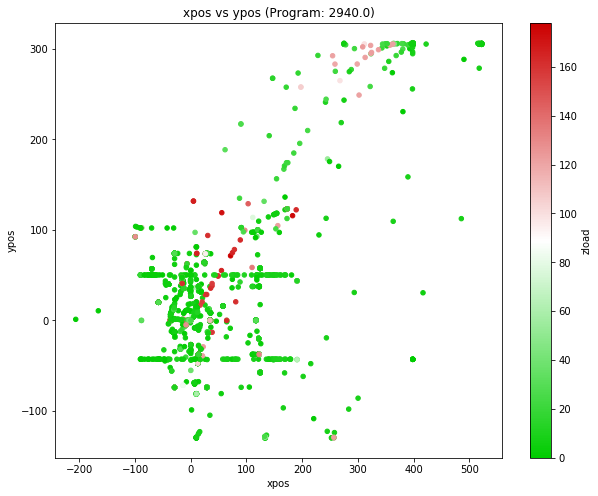

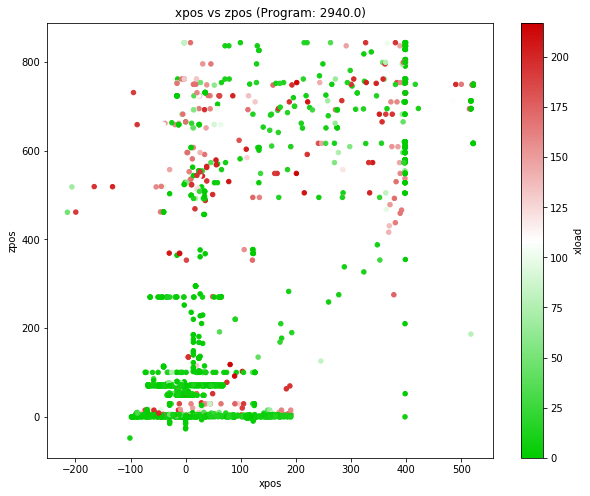

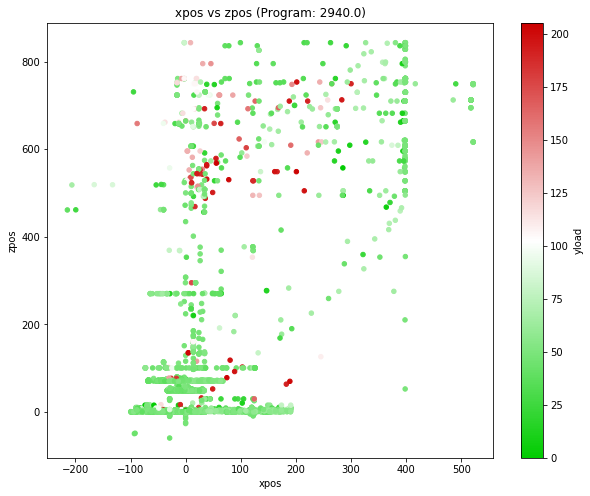

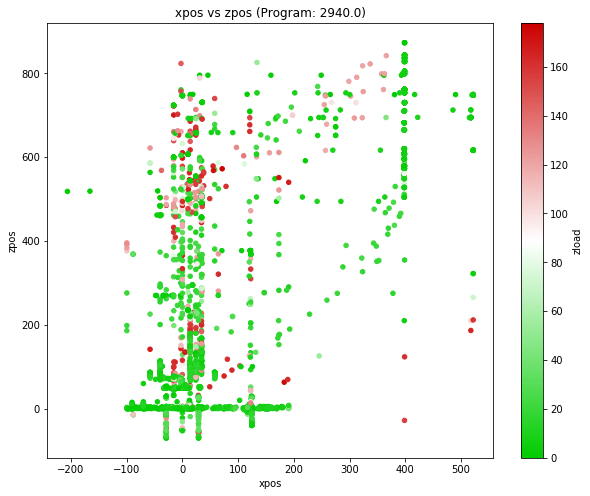

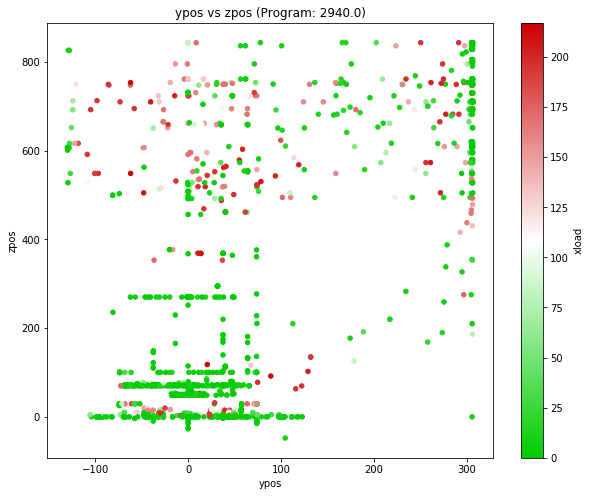

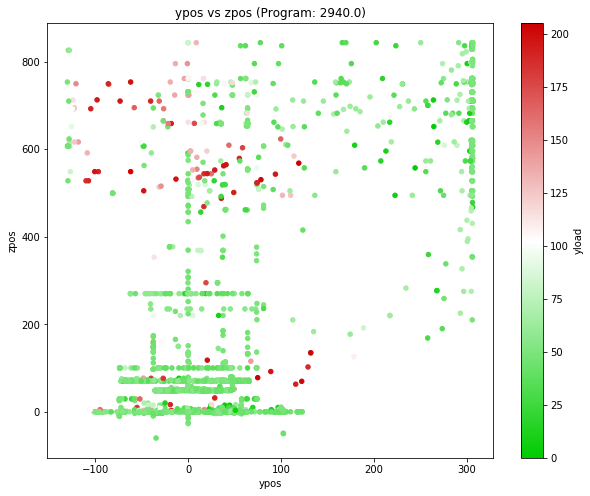

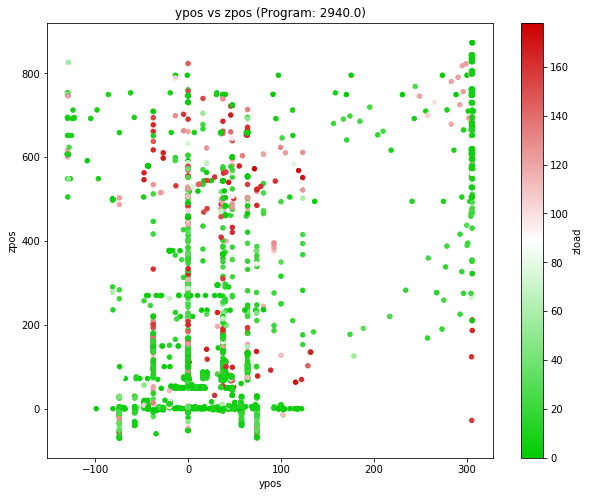

In [145]:
plot_graph(2940.0)